Team :
1. Ica Nur Cahyani
2. Muhammad Fernanda
3. Tarissa Aura

Kelas = PYTN-KS15

    Heart Failure Clinical records adalah sebuah dataset tentang penyakit jantung yang berpotensi menyebabkan kematian. Pada dataset ini terdapat faktor -faktor yang menyebabkan terjadinya sebuah kematian akibat gagal jantung. Dataset ini mengandung informasi pasien seperti usia, kandungan hemoglobin pasien, riwayat diabetes, dan informasi lain yang berkaitan dengan penyakit jantung. Melalui analisis dataset ini, diharapkan dapat memprediksi kemungkinannya adanya kematian akibat gagal jantung.  

# IMPORT PUSTAKA

In [6]:
#untuk dataframe
import pandas as pd
import numpy as np
import scipy

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from imblearn.over_sampling import SMOTE #Balancing data
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier


# DATA LOADING

### Import Data

In [8]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")


### Menampilkan Data

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Menampilkan Jumlah baris dan kolom dataset

In [7]:
df.shape

(299, 13)

### Menampilkan judul kolom 

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Menampilkan Informasi Kolom

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Penjelasan Data 

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin atau anemia dengan kode 1: menderita anemia, dan 0:Tidak menderita anemia
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes, dengan kode 1:"Ya penderita diabetes, 0:Tidak menderita diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi, dengan kode 1:Ya  hipertensi, 0:Tidak hipertensi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita, 0:Wanita, 1: Laki-laki
11. smoking - apakah pasien merokok dengan kode 0:Tidak perokok, 1:Ya merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# DATA CLEANING

### Mengecek missing value di setiap kolom

In [10]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Melihat jumlah Unique di setiap kolom

In [11]:
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


### Pengecekan data duplicated

In [12]:
df.duplicated().sum()

0

### Deskripsi Data

In [13]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Dari seluruh pengecekan yang telah dilakukan sebelum data cleaning, menyimpulkan bahwa dataset ini tidak memiliki missing value dan tidak ada data duplicated. 

In [14]:
df.rename(columns={'age':'usia', 'anaemia':'anemia', 'high_blood_pressure':'hipertensi', 'DEATH_EVENT':'kematian'}, inplace=True)
df.head()

,usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   usia                      299 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   hipertensi                299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  kematian                  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Mengubah tipe data dari int menjadi object

# EDA

### Membandingkan Jumlah Kematian 

0    203
1     96
Name: kematian, dtype: int64


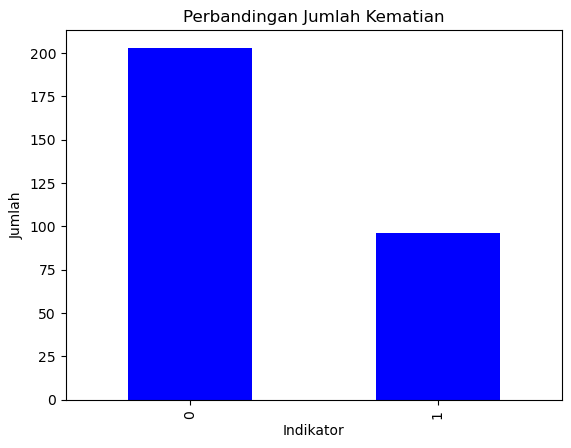

In [16]:
# Menghitung jumlah kemunculan setiap nilai dalaam kolom "DEATH_EVENT"
value_kematian = df["kematian"].value_counts()

#Membuat grafik batang 
value_kematian.plot(kind="bar", color="blue")
plt.title("Perbandingan Jumlah Kematian")  #Judul Grafik 
plt.xlabel( 'Indikator') #Judul sumbu X
plt.ylabel ('Jumlah') #Judul sumbu Y
print(value_kematian)
plt.show()



Berdasarkan grafik batang diatas, jumlah pasien yang meninggal akibat gagal jantung lebih sedikit daripada jumlah pasien tidak meninggal

### Distribusi Penyebaran Usia Pasien yang meninggal 

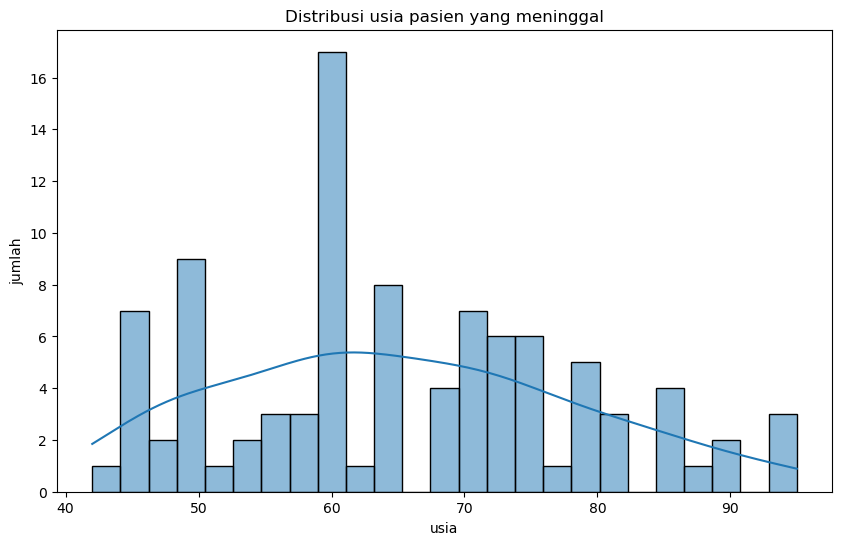

In [17]:
# Membuat variabel dengan data pasien yang meninggal
kematian_y = df[df['kematian']== 1]


# Membuat grafik distribusi 
plt.figure(figsize=(10, 6))
sns.histplot(kematian_y, x='usia', kde=True, bins=25)
plt.title('Distribusi usia pasien yang meninggal')
plt.xlabel ('usia')
plt.ylabel ('jumlah')
plt.show()




Dari grafik distribusi penyebaran diatas, dapat dilihat bahwa pasien penyakit  yang meninggal akibat gagal jantung paling banyak dialami oleh pasien yang berusia 60 tahunan. 

### Analisis Kematian berdasarkan faktor anemia

anemia  kematian
0       0           120
1       0            83
0       1            50
1       1            46
dtype: int64


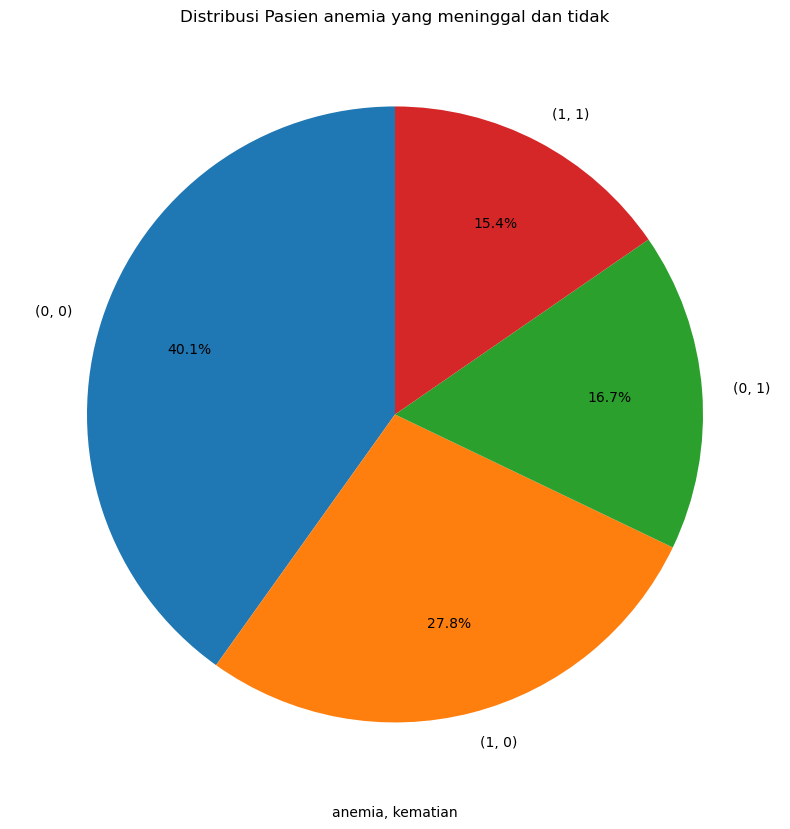

In [18]:
#Memilih kolom dan menghitung jumlah kemunculan pada kolom yang dipilih
anemia_k = df[['anemia', 'kematian']].value_counts()

#Membuat grafik

anemia_k.plot(
    kind="pie",
    figsize=(16,10),
    autopct='%1.1f%%',
    startangle=90,
    label=None,
    pctdistance=0.7,
    rot = 45,
    subplots = True)

plt.title('Distribusi Pasien anemia yang meninggal dan tidak')
plt.xlabel('anemia, kematian')

print(anemia_k)
plt.show()



- (0,0)= Pasien penyakit jantung tidak menderita anemia dan tidak meninggal
- (1,0) = Pasien penyakit jantung menderita anemia dan tidak meninggal
- (0,1) = Pasien penyakit jantung tidak menderita anemia dan meninggal
- (1,1) = Pasien penyakit jantung menderita anemia dan meninggal

Dari grafik  diatas dapat dilihat bahwa pasien penderita jantung yang menderita anemia dan meninggal jumlahnya lebih sedikit daripada jumlah pasien yang menderita anemia dan tidak meninggal.Kemudian jumlah pasien yang tidak menderita anemia dan tidak meninggal jumlahnya lebih banyak daripada pasien yang tidak menderita anemia tapi meninggal.

### Analisis Kematian pasien penyakit jantung berdasarkan kandungan creatinine_phosphokinase

In [19]:
# Mmebuat variabel baru berisi kolom kematian dan creatinine_phosphokinase
df_kc = df[["kematian",'creatinine_phosphokinase']]

# Menampilkan variabel
df_kc.head()


,kematian,creatinine_phosphokinase
0,1,582
1,1,7861
2,1,146
3,1,111
4,1,160


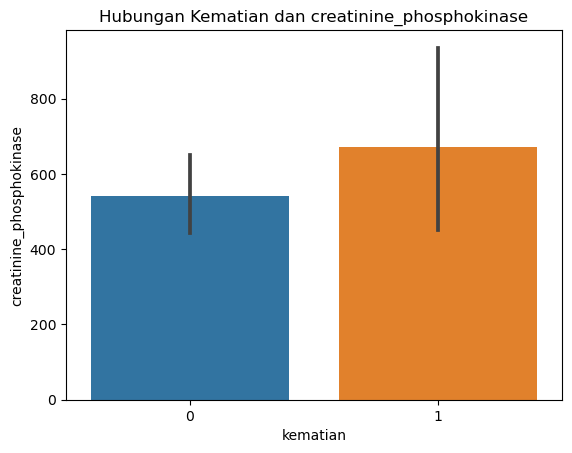

In [20]:
# Membuat grafik batang 
sns.barplot(df_kc, x='kematian', y="creatinine_phosphokinase")
plt.title('Hubungan Kematian dan creatinine_phosphokinase')
plt.show()


Pasien penderita jantung yang meninggal adalah pasien yang memiliki kandungan creatinine_phosphokinase lebih dari atau sama dengan  600 mcg/L

# Anaisis Pasien Jantung dengan Komplikasi  Diabetes dan Meninggal 

In [21]:
# Mmebuat variabel baru berisi kolom "Kematian" dan "diabetes"
df_dia = df[["diabetes", "kematian"]].value_counts()

#menampilkan data
df_dia.head()

diabetes  kematian
0         0           118
1         0            85
0         1            56
1         1            40
dtype: int64

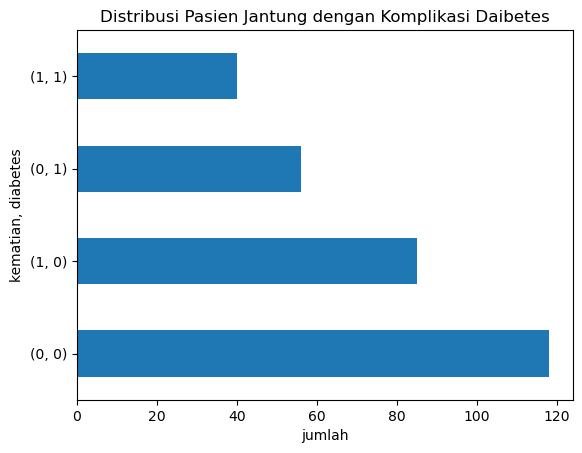

In [22]:
# membuat grafik 
df_dia.plot(
    kind="barh")
    
plt.title("Distribusi Pasien Jantung dengan Komplikasi Daibetes")
plt.xlabel( "jumlah")
plt.ylabel("kematian, diabetes")
plt.show()

- (0,0) = Pasien Jantung tidak komplikasi diabetes dan tidak meninggal
- (1,0) = Pasien Jantung komplikasi diabetes dan tidak meninggal
- (0,1) = Pasien Jantung tidak komplikasi diabetes dan meninggal
- (1,1) = Pasien Jantung komplikasi diabetes dan meninggal 

Berdasarkan diagaram batang diatas dapat diketahui bahwa pasien jantung dengan komplikasi diabetes yang meninggal jumlahnya lebih sedikit daripada jumlah pasien jantung komplikasi diabetes yang tidak meninggal. 

# Analisis Kematian dengan Faktor Hipertensi

In [23]:
# membuat variabel dengan kolom "hipertensi" dan "kematian"
df_h = df[["hipertensi", "kematian"]].value_counts()
 
# menampilkan ddf_h
df_h.head()

hipertensi  kematian
0           0           137
1           0            66
0           1            57
1           1            39
dtype: int64

Text(0.5, 0, 'hipertensi, kematian')

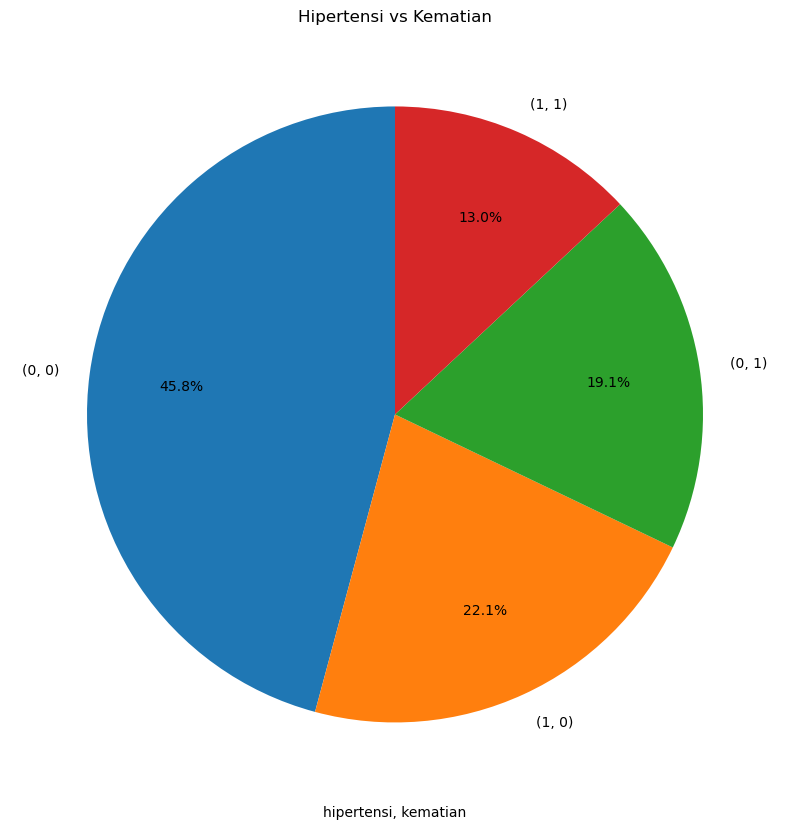

In [24]:
#Membuat grafik

df_h.plot(
    kind="pie",
    figsize=(16,10),
    autopct='%1.1f%%',
    startangle=90,
    label=None,
    pctdistance=0.7,
    rot = 45,
    subplots = True)

plt.title('Hipertensi vs Kematian')
plt.xlabel('hipertensi, kematian')


    - (0,0) = Pasien Jantung tidak hipert dan tidak meninggal
    - (1,0) = Pasien Jantung hipertensi dan tidak meninggal
    - (0,1) = Pasien Jantung tidak hipertensi dan meninggal
    - (1,1) = Pasien Jantung hipertensi dan meninggal

Berdasarkan diagaram batang diatas dapat diketahui bahwa pasien jantung dengan hipertensi yang meninggal hanya 13.0% dari keseluruhan pasien jumlah ini lebih sedikit daripada jumlah pasien jantung dengan hipertensi dan tidak meninggal yang jumlahnya sebesar 22,1% dari keseluruhan pasien 

# Analisis Kematian dengan serum_creatinine 	

In [25]:
# membuat variabel dengan kolom "serum_creatinine" dan kolom "kematian"
df_sc = df[["kematian","serum_creatinine"]]

#menampilkan data
df_sc.head()




,kematian,serum_creatinine
0,1,1.9
1,1,1.1
2,1,1.3
3,1,1.9
4,1,2.7


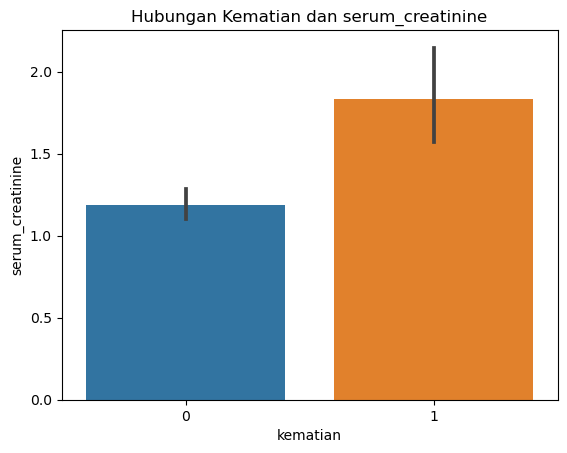

In [26]:
#membuat grafik 
sns.barplot(df_sc, x='kematian', y="serum_creatinine")
plt.title('Hubungan Kematian dan serum_creatinine')
plt.show()

Pasien Jantung yang meninggal adalah pasien jantung yang memiliki kadar serm_creatinine  lebih dari atau sama dengan 1.25 mg/dl

# Analisis Kematian dengan Kadar serum_sodium

   kematian  serum_sodium
0         1           130
1         1           136
2         1           129
3         1           137
4         1           116


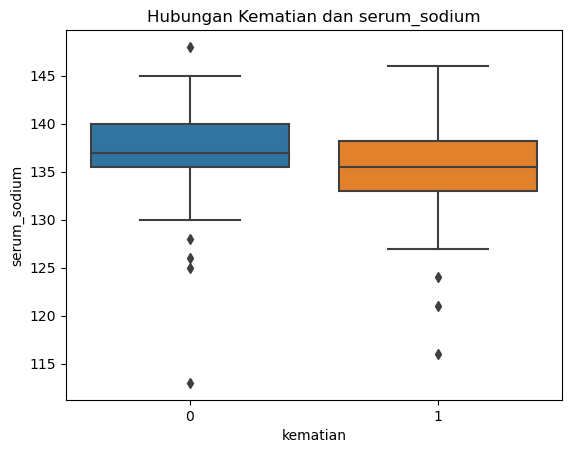

In [27]:
# membuat variabel dengan kolom "kematian" dan kolom "serum_sodium"
df_ss = df[["kematian", "serum_sodium"]]

# menampilkan data 
print(df_ss.head())

#membuat grafik 
#membuat grafik 
sns.boxplot(df_ss, x='kematian', y="serum_sodium")
plt.title('Hubungan Kematian dan serum_sodium')
plt.show()

Pasien Jantung yang meninggal adalah pasien yang memiliki kadar serum_sodium sama dengan atau dibawah 133 mEq/L

# Analisis Kematian dan Smoking 

In [28]:
# membuat variabel dengan kolom "smoking" dan kolom "kematian"
df_sk = df[["smoking", "kematian"]].value_counts()

#menampilkan data
df_sk.head()

smoking  kematian
0        0           137
         1            66
1        0            66
         1            30
dtype: int64

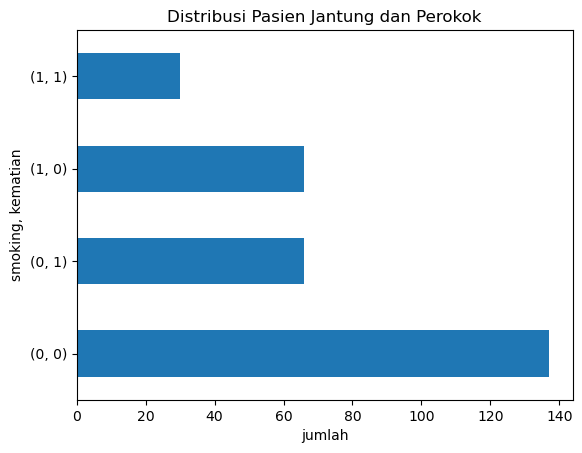

In [29]:
#membuat grafik 

df_sk.plot(
    kind="barh")
    
plt.title("Distribusi Pasien Jantung dan Perokok")
plt.xlabel( "jumlah")
plt.ylabel("smoking, kematian")
plt.show()


- (0,0) = Pasien Jantung yang tidak merokok dan tidak meninggal
- (0,1) = Pasien Jantung yang tidak merokok dan meninggal 
- (1,0) = Pasien Jantung yang merokok dan tidak meninggal 
- (1,1) = Pasien Jantung yang merokok dan meninggal 

## SPLIT DATA 

In [30]:
x = df.drop("kematian", axis=1)
y = df["kematian"]

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Handling Outlier

In [31]:
df.shape

(299, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   usia                      299 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   hipertensi                299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  kematian                  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [33]:
nums =[i for i in df.columns if df[i].dtypes != 'object']
nums

['usia',
 'anemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'hipertensi',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'kematian']

## Handling Outlier kolom "usia"

### Mengecek outlier kolom "usia"

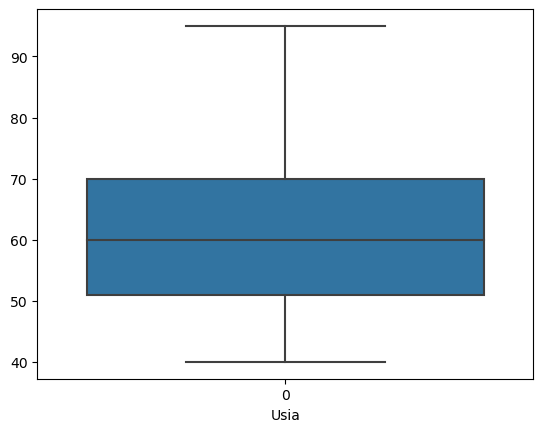

In [34]:
# Visualisasi kolom "usia" 
sns.boxplot(df["usia"])
plt.xlabel('Usia')
plt.show()

Berdasarkan visualisasi diatas kolom "usia" tidak memiliki outlier

## Handling outlier Kolom "creatinine_phosphokinase"

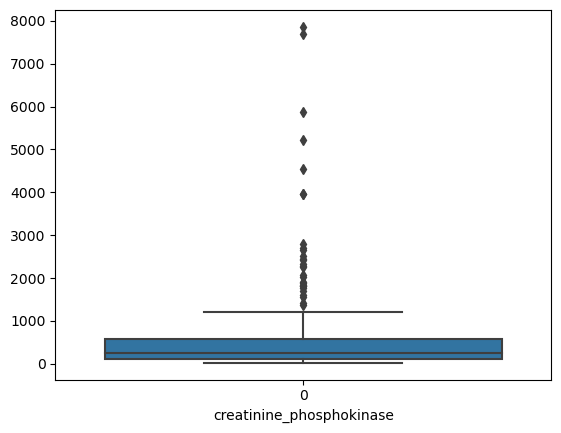

In [35]:
# Visualisai kolom "creatinine_phosphokinase"
sns.boxplot(df["creatinine_phosphokinase"])
plt.xlabel("creatinine_phosphokinase")
plt.show()

### Menangani Outlier

In [36]:
# menghitung nilai quartil 1 , quartil 2 dan IQR
Q1 = df['creatinine_phosphokinase'].quantile(0.25) 
Q3 = df['creatinine_phosphokinase'].quantile(0.75) 
IQR = Q3-Q1 
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

## Filtering outlier
df_crout = df[df['creatinine_phosphokinase'] > (Q3 + (1.5 * IQR))].sum()
df[df['creatinine_phosphokinase']<(Q1-(1.5*IQR))].sum()

Nilai Kuartil 1 :  116.5
Nilai Kuartil 3 :  582.0
Nilai Rentang :  465.5


usia                        0.0
anemia                      0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
hipertensi                  0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
kematian                    0.0
dtype: float64

## Handling outlier kolom "ejection_fraction"

Text(0.5, 0, 'ejection_fraction')

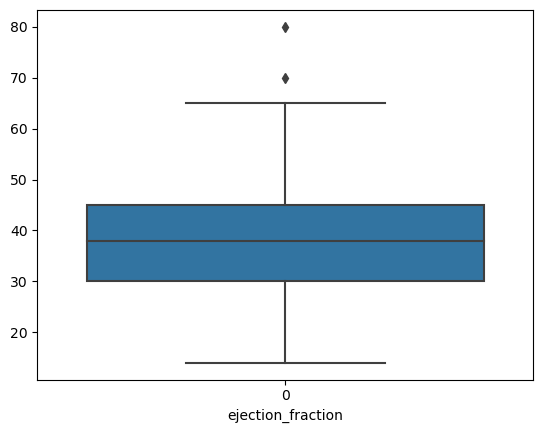

In [37]:
#visualisasi
sns.boxplot(df["ejection_fraction"])
plt.xlabel("ejection_fraction")

### Menangani outlier

In [38]:
# menghitung nilai quartil 1 , quartil 2 dan IQR
Q1 = df['ejection_fraction'].quantile(0.25) 
Q3 = df['ejection_fraction'].quantile(0.75) 
IQR = Q3-Q1 
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

## Filtering outlier
df[df['ejection_fraction'] > (Q3 + (1.5 * IQR))].sum()
df[df['ejection_fraction']<(Q1-(1.5*IQR))].sum()

Nilai Kuartil 1 :  30.0
Nilai Kuartil 3 :  45.0
Nilai Rentang :  15.0


usia                        0.0
anemia                      0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
hipertensi                  0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
kematian                    0.0
dtype: float64

## Handling Outlier Kolom "platelets"

Text(0.5, 0, 'platelets')

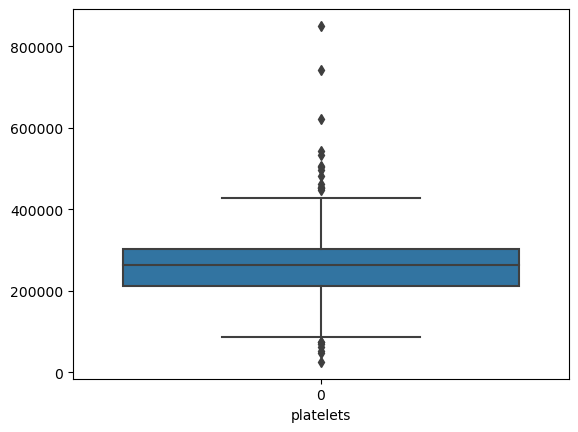

In [39]:
# Visualisasi
sns.boxplot(df["platelets"])
plt.xlabel("platelets")

### Menangani Outlier

In [40]:
# Menghitung nilai quartil 1 , quartil 2 dan IQR
Q1 = df['platelets'].quantile(0.25) 
Q3 = df['platelets'].quantile(0.75) 
IQR = Q3-Q1 
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

## Filtering outlier
df[df['platelets'] > (Q3 + (1.5 * IQR))].sum()
df[df['platelets'] < (Q1-(1.5 * IQR))].sum()

Nilai Kuartil 1 :  212500.0
Nilai Kuartil 3 :  303500.0
Nilai Rentang :  91000.0


usia                           454.0
anemia                           3.0
creatinine_phosphokinase      5876.0
diabetes                         3.0
ejection_fraction              258.0
hipertensi                       0.0
platelets                   403100.0
serum_creatinine                10.8
serum_sodium                   952.0
sex                              5.0
smoking                          1.0
time                          1163.0
kematian                         4.0
dtype: float64

## Handling Outlier Kolom serum_creatinine

Text(0.5, 0, 'serum_creatinine')

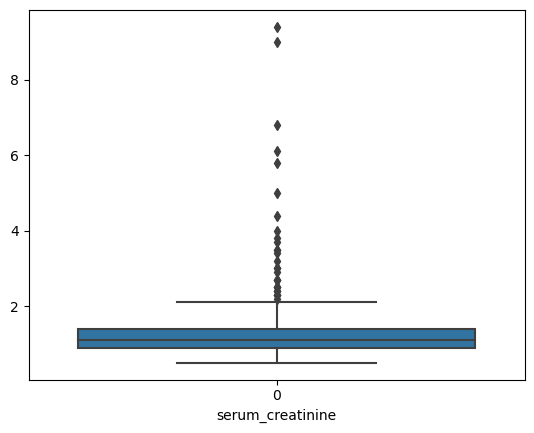

In [41]:
# Visualisasi
sns.boxplot(df["serum_creatinine"])
plt.xlabel("serum_creatinine")

### Menangani Outlier

In [42]:
# Menghitung nilai quartil 1 , quartil 2 dan IQR
Q1 = df['serum_creatinine'].quantile(0.25) 
Q3 = df['serum_creatinine'].quantile(0.75) 
IQR = Q3-Q1 
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

## Filtering outlier
df[df['serum_creatinine'] > (Q3 + (1.5 * IQR))].sum()
df[df['serum_creatinine'] < (Q1-(1.5 * IQR))].sum()

Nilai Kuartil 1 :  0.9
Nilai Kuartil 3 :  1.4
Nilai Rentang :  0.4999999999999999


usia                        0.0
anemia                      0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
hipertensi                  0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
kematian                    0.0
dtype: float64

## Handling Outlier Kolom "serum_sodium"

Text(0.5, 0, 'serum_sodium')

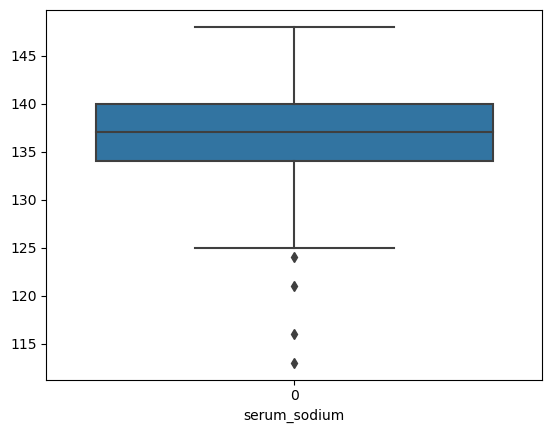

In [43]:
# Visualisasi
sns.boxplot(df["serum_sodium"])
plt.xlabel("serum_sodium")

In [44]:
# Menghitung nilai quartil 1 , quartil 2 dan IQR
Q1 = df['serum_sodium'].quantile(0.25) 
Q3 = df['serum_sodium'].quantile(0.75) 
IQR = Q3-Q1 
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

## Filtering outlier
new_dfss = df[df['serum_sodium'] > (Q3 + (1.5 * IQR))].sum()
df[df["serum_sodium"] < (Q1-(1.5 * IQR))].sum()

Nilai Kuartil 1 :  134.0
Nilai Kuartil 3 :  140.0
Nilai Rentang :  6.0


usia                           219.00
anemia                           2.00
creatinine_phosphokinase      2121.00
diabetes                         4.00
ejection_fraction              127.00
hipertensi                       1.00
platelets                   948358.03
serum_creatinine                 8.50
serum_sodium                   474.00
sex                              1.00
smoking                          1.00
time                           309.00
kematian                         3.00
dtype: float64

Text(0.5, 0, 'time')

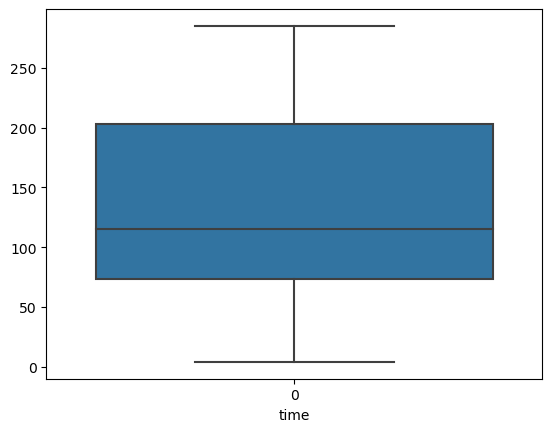

In [45]:
# Visualisasi
sns.boxplot(df["time"])
plt.xlabel("time")

# Menemukan Korelasi 

<Axes: >

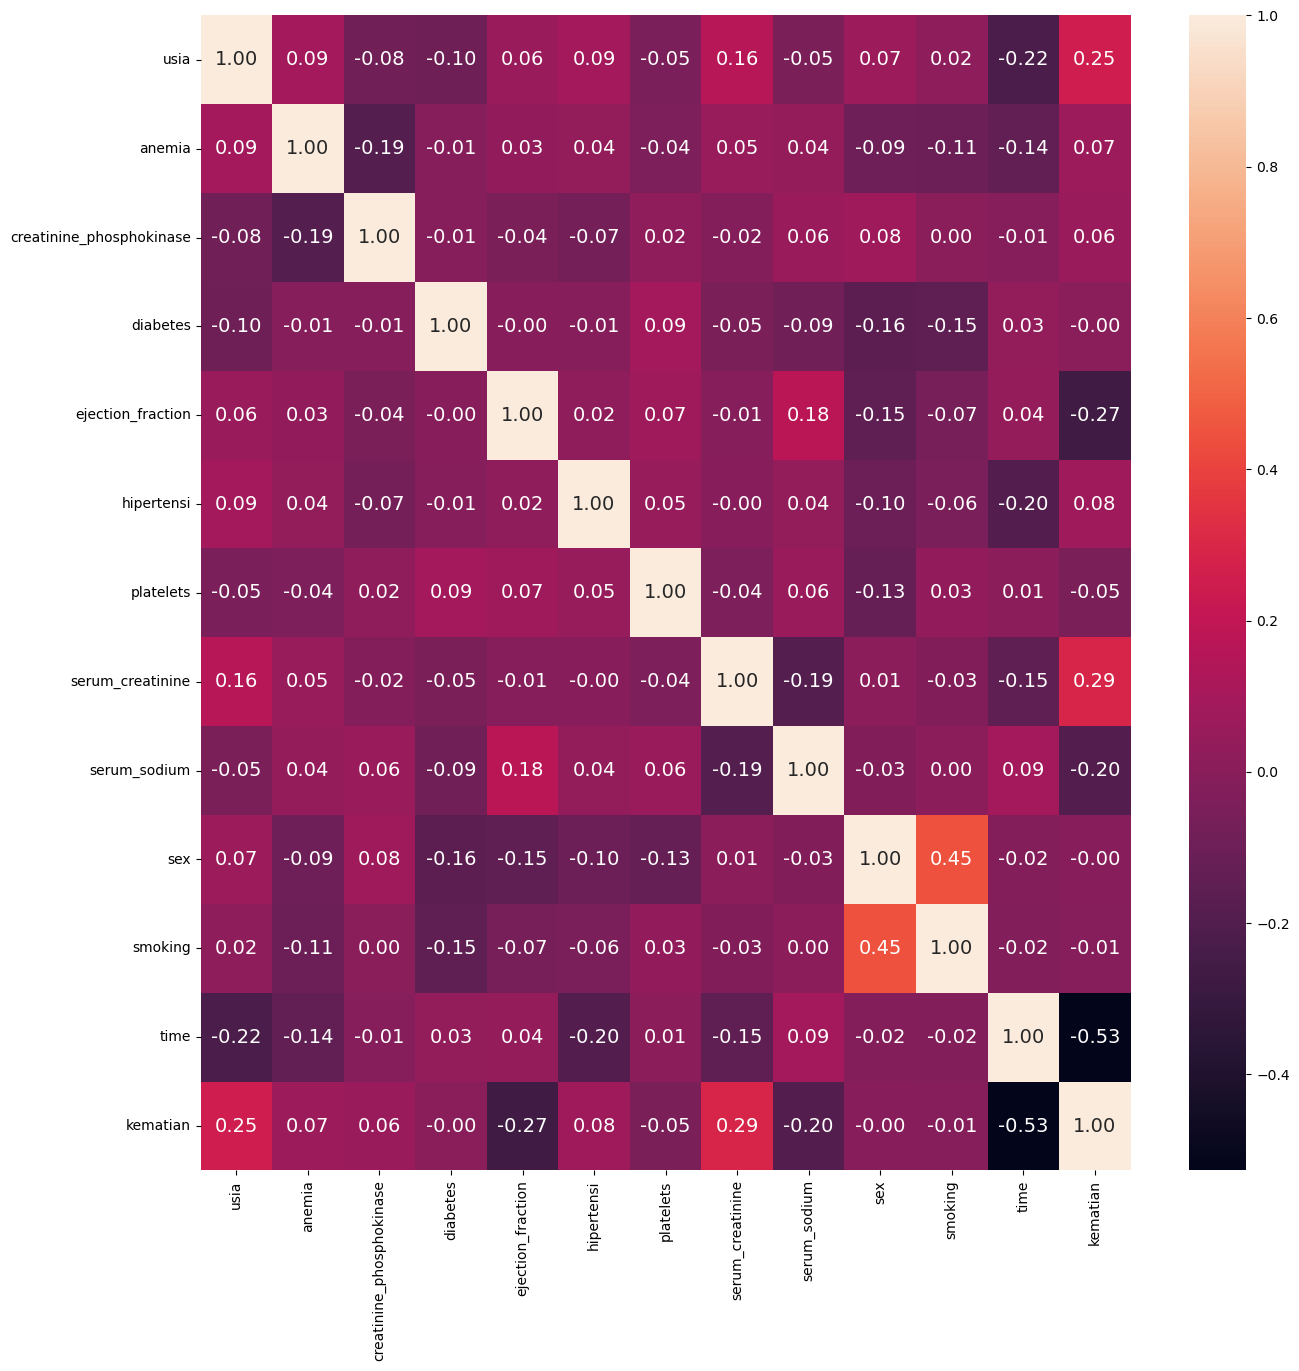

In [46]:
plt.figure(figsize= (15,15))
sns.heatmap(df.corr(), annot=True, fmt= '.2f', annot_kws ={"fontsize": "14"})

Berdasarkan tabel koerelasi diatas yang memeiliki korelasi positif terbesar adalah kematian dengan usia, kematian dengan serum_creatini, dan sex dengan smoking. Kemudian hubungan yang menghasilkan korelasi negatif terbesar adalah kematian dengan serum_sodium dan kematian dengan time. 

# DATA PREPROCESING

### Handle Imbalanced Data Kematian

Dari eksplorasi data sebelumnya telah diketahui bahwa data pasien yang meninggal dan tidak meninggal memiliki selisih yang sangat besar sehingga datanya tidak balance maka diperlukan balancing data agar data pada kolom "kematian" menjadi balance. Balancing data dilakukan melalui teknik oversampling yaitu menambahkan dataset pada data yang jumlahnya sedikit agar lebih seimbang.

In [47]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x,y)

In [48]:
# Split data resampled
X_train, x_test, Y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

### Pendefinisian Model 

In [49]:
RFC = RandomForestClassifier()
naivebayes= GaussianNB()
LogReg = LogisticRegression()
knc = KNeighborsClassifier()

# ENSEMBLE MODEL 

### VotingClassifier

In [50]:
# Membuat variabel voting classifier
estimators = [("RFC", RFC), ("naivebayes", naivebayes), ("LogReg", LogReg), ("knc", knc)]

#Inisisasi Voting Classifier
voting_ensemble = VotingClassifier(estimators=estimators, voting='hard')

# Melatih model dengan data training
voting_ensemble.fit(X_train, Y_train)

# Evaluasi model 
score = voting_ensemble.score(x_test, y_test)


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# EVALUASI MODEL 

### Mencetak akurasi VotingClassifier

In [51]:
print("Akurasi model VottingClassifier:", score)

Akurasi model VottingClassifier: 0.819672131147541


### Confusion Matrix Logistic regression

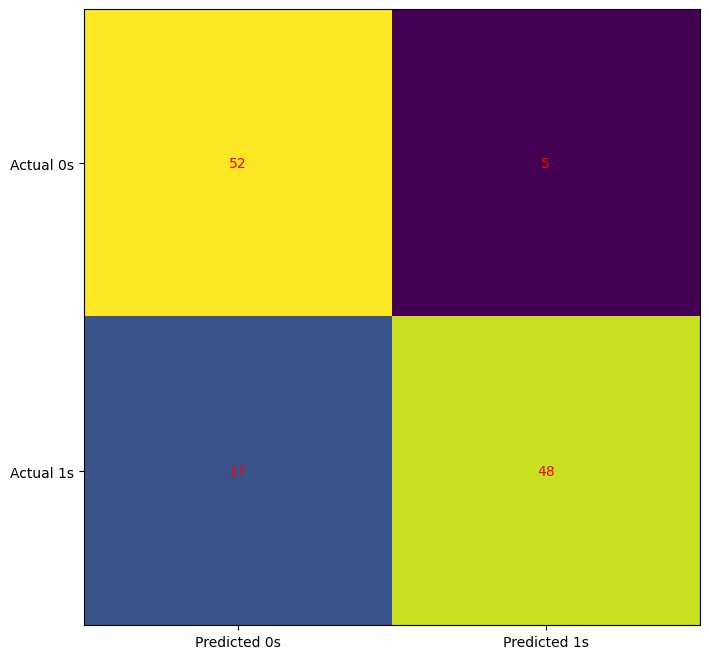

In [52]:
# Membuat predict
voting_predictions = voting_ensemble.predict(x_test)

# Mmebuat confusion Matrix
cm = confusion_matrix(y_test, voting_predictions)


fig, ax = plt.subplots(figsize=(8, 8))
plt.title =("Confusion Matrix Logistic Regression")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

# MODEL INFERENCE

In [53]:
df.columns

Index(['usia', 'anemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'hipertensi', 'platelets', 'serum_creatinine',
       'serum_sodium', 'sex', 'smoking', 'time', 'kematian'],
      dtype='object')

In [54]:
df.head()

,usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [55]:
df_rand = { 'usia': [67.0, 75.0, 80.0], 
           'anemia': [1,0,0], 
           'creatinine_phosphokinase':[550,140,350], 
           'diabetes':[1,0,1],
           'ejection_fraction':[25,39,50], 
           'hipertensi':[0,1,0], 
           'platelets':[250000,300000,110000], 
           'serum_creatinine':[2.0,1.5,2.6],
           'serum_sodium':[150,110,100], 
           'sex':[0,0,1], 
           'smoking':[1,0,1], 
           'time':[3,2,7]}
df_rand= pd.DataFrame(df_rand)

In [56]:
df_rand.head() 

,usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,67.0,1,550,1,25,0,250000,2.0,150,0,1,3
1,75.0,0,140,0,39,1,300000,1.5,110,0,0,2
2,80.0,0,350,1,50,0,110000,2.6,100,1,1,7


In [57]:
# Menguji data model inference dengan ensembel model
voting_ensemble1 = voting_ensemble.predict(df_rand)

# menampilkan hasil uji
print("voting_ensemble1:", voting_ensemble1)



voting_ensemble1: [1 1 1]


# Kesimpulan 

Berdasarkan pengolahan yang telah dilakukan dalam mengkelompokan seorang pasien memiliki resiko kematian akibat gagal jantug ditentukan oleh faktor -faktor berikut ini :
 
 - age  : umur pasien
 - anemia : apakah ada pengurangan haemoglobin atau anemia 
 - creatinine_phosphokinase : level enzim CPK dalam mcg/L
 - diabetes : apakah pasien punya riwayat diabetes
 - ejection_fraction : persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
 - hipertensi : apakah pasien punya darah tinggi, 
 - platelets : jumlah platelet di darah dalam kiloplatelets/mL
 - serum_creatinine : level serum creatinine di darah dalam mg/dL
 - serum_sodium : level serum sodium di darah dalam mEq/L
 - sex apakah pasien pria atau wanita
 - smoking : apakah pasien merokok 
 - time : waktu dalam hari untuk follow-up
 - Kematian : apakah pasien sudah meninggal saat waktu follow-up
   
Dengan melalui eksplorasi data berupa visualisasi perbandingan antara kolom kematian dengan kolom- kolom lainnya dapat disimpulkan bahwa :
 1. Kebanyakan pasien yang memiliki resiko meninggal akibat gagal jantung adalah pasien yang berusia 60 tahunan 
 2. Pasien yang memiliki resiko meninggal akibat gagal jantung adalah pasien yang memiliki kadar serum_creatinin diatas atau sama dengan  1.25 mg/dl
 3. Pasien penderita jantung yang meninggal adalah pasien yang memiliki kandungan creatinine_phosphokinase lebih dari atau sama dengan 600 mcg/L
 4.Pasien yang  memiliki resiko meninggal akibat gaagl jantung adalah pasien yang memiliki kadar serum_sodium sama dengan atau dibawah 133 mEq/L

Dengan menggunakan ensembel model berupa VotingClassifier dimana model yang digunakan adalah Random Forest, Naive Bayes, Logistic Regression dan KNN dengan kolom "kematian" sebagai target dan kolom 'usia', 'anemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'hipertensi', 'platelets', 'serum_creatinine',
'serum_sodium', 'sex', 'smoking', 'time' sebagai fiturnya didapatkan skor keakurasiannya model sebesar 0.81 atau 81%. 
        

 

# END